**Задача**

Этот набор данных содержит опрос удовлетворенности авиапассажиров. Какие факторы сильно коррелируют с удовлетворенным (или неудовлетворенным) пассажиром? Возможно предсказать удовлетворенность пассажиров?

# Новый раздел

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/file/d/1q3TlIBXha77_ACWYsi9PB_ziaJvQ6oG4/view?usp=sharing"

id = link.split("/")[-2]

downloaded = drive.CreateFile({"id":id})
downloaded.GetContentFile("train.csv")

df = pd.read_csv("train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


*   **Gender**: Gender of the passengers (Female, Male) - Пол пассажиров (женщина, мужчина)

*   **Customer** Type: The customer type (Loyal customer, disloyal customer) - Тип клиента (постоянный клиент, нелояльный клиент).

*   **Age**: The actual age of the passengers - Фактический возраст пассажиров

*   **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel) - Цель полета пассажиров (Личная поездка, Деловая поездка)

*   **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus) - Туристический класс в самолете пассажиров (Бизнес, Эко, Эко Плюс)

*   **Flight distance**: The flight distance of this journey - Расстояние полета этого путешествия

*   **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) - Уровень удовлетворенности услугой Wi-Fi на борту (0: не применимо; 1–5)

*   **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient - Уровень удовлетворенности удобным временем отправления/прибытия

*   **Ease of Online booking**: Satisfaction level of online booking - Уровень удовлетворенности онлайн-бронированием

*   **Gate location**: Satisfaction level of Gate location - Уровень удовлетворенности расположением входа на посадку

*   **Food and drink**: Satisfaction level of Food and drink - Уровень удовлетворенности едой и напитками

*   **Online boarding**: Satisfaction level of online boarding - Уровень удовлетворенности онлайн-интернатом

*   **Seat comfort**: Satisfaction level of Seat comfort - Удовлетворительный уровень комфорта сиденья

*   **Inflight entertainment**: Satisfaction level of inflight entertainment - Уровень удовлетворенности развлечениями на борту

*   **On-board service**: Satisfaction level of On-board service - Уровень удовлетворенности обслуживанием на борту

*   **Leg room service**: Satisfaction level of Leg room service - Уровень удовлетворенности обслуживанием в номере для ног

*   **Baggage handling**: Satisfaction level of baggage handling - Уровень удовлетворенности обработкой багажа

*   **Check-in service**: Satisfaction level of Check-in service - Уровень удовлетворенности услугой регистрации

*   **Inflight service**: Satisfaction level of inflight service - Уровень удовлетворенности обслуживанием на борту

*   **Cleanliness**: Satisfaction level of Cleanliness - Удовлетворительный уровень чистоты

*   **Departure Delay in Minutes**: Minutes delayed when departure - Задержки при отправлении в минутах

*   **Arrival Delay in Minutes**: Minutes delayed when Arrival - Задержки при прибытии в минутах

*   **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction) - Уровень удовлетворенности от авиакомпании (удовлетворенность, нейтральность или неудовлетворенность)


Избавимся от столбца 'id', так как его значени не влияют на классы

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.dtypes

Unnamed: 0                             int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Найдем количество элементов в каждом классе

In [ ]:
count1 = 0
count2 = 0
for i in range(len(df['satisfaction'])):
  if df['satisfaction'][i] == 'satisfied':
    count1 += 1
  elif df['satisfaction'][i] == 'neutral or dissatisfied':
    count2 += 1
print('Число satisfied: ',count1)
print('Число neutral or dissatisfied: ',count2)

Число satisfied:  45025
Число neutral or dissatisfied:  58879


Поиск и обработка пустых пропущенных значений

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     1035

---
**Анализ данных**


In [ ]:
df.describe()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,29997.914016,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51955.500000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77924.750000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df.groupby('satisfaction').mean()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,52069.525700,37.569126,928.607084,2.399748,3.129070,2.547149,2.976524,2.958362,2.656337,3.037072,2.894100,3.019303,2.991107,3.375709,3.043239,3.389015,2.936317,16.431913,17.127536
satisfied,51793.971646,41.748558,1530.180302,3.161191,2.969887,3.031316,2.977682,3.520814,4.027285,3.966234,3.965276,3.857585,3.822438,3.966345,3.645656,3.969887,3.744081,12.546362,12.630799


In [ ]:
df.groupby('satisfaction').std()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,29981.109687,16.459264,790.409640,0.964374,1.500546,1.205818,1.198632,1.346581,1.145831,1.303005,1.323621,1.285801,1.303110,1.177146,1.281255,1.175653,1.325911,40.046146,40.560248
satisfied,30019.486674,12.765169,1128.321401,1.588731,1.552317,1.575395,1.374288,1.236120,1.191743,1.142283,1.076821,1.126898,1.175094,1.099676,1.158806,1.091209,1.142310,35.315723,35.962008


In [ ]:
df.groupby('satisfaction').median()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,52117.0,36.0,671.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,0.0,0.0
satisfied,51715.0,43.0,1250.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


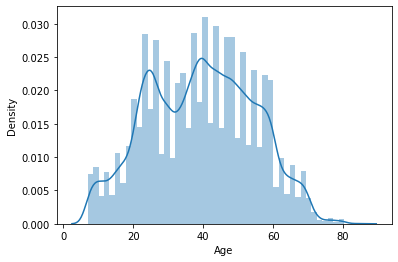

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


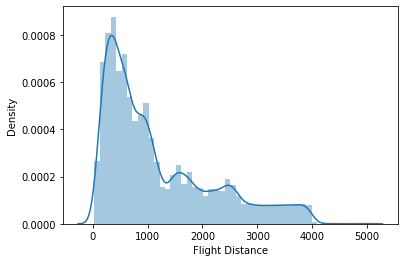

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


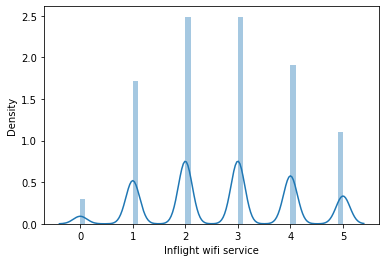

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


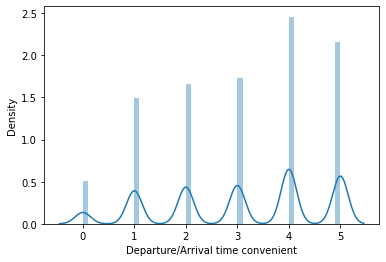

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


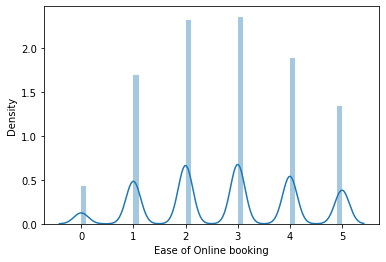

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


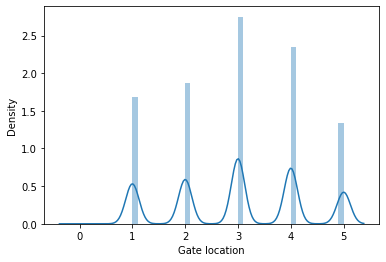

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


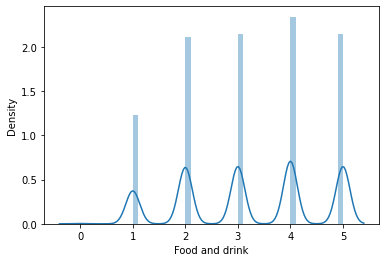

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


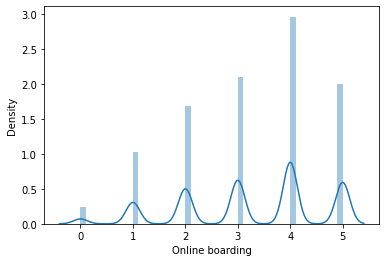

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


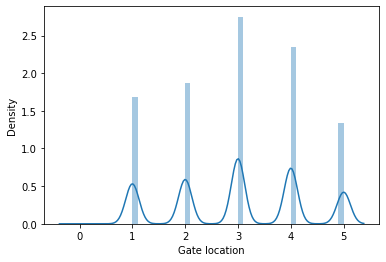

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


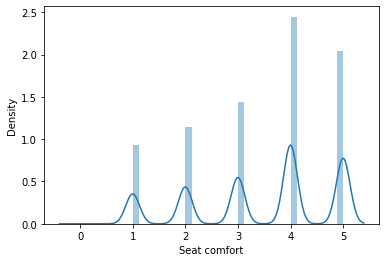

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


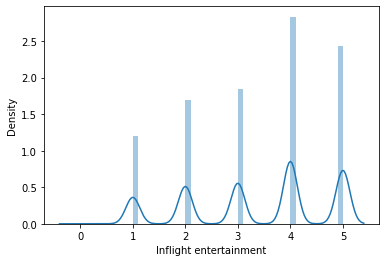

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


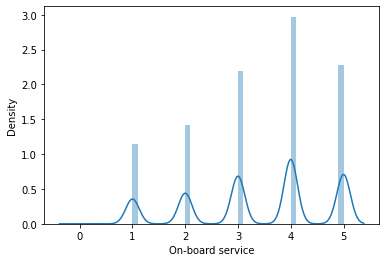

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


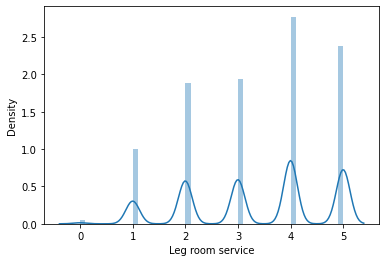

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


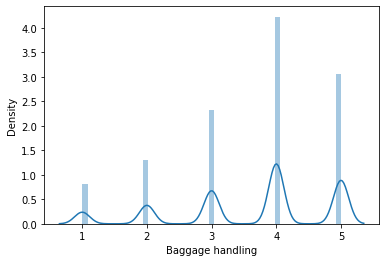

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


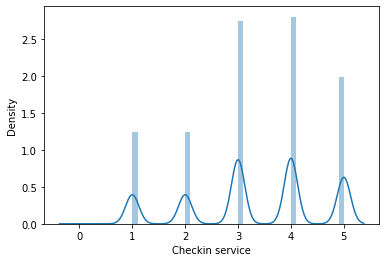

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


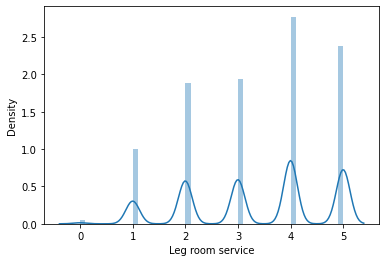

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


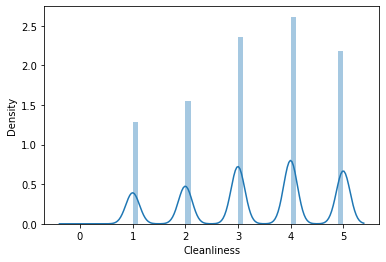

In [ ]:
ind = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Gate location',
       'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Leg room service', 'Cleanliness']
for i in range(len(ind)):
  sns.distplot(df[ind[i]])
  plt.show()

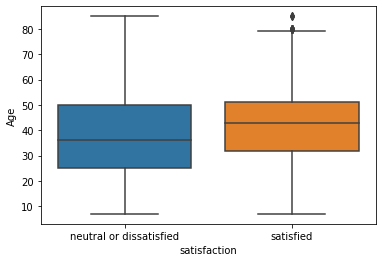

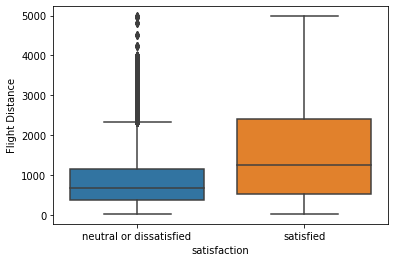

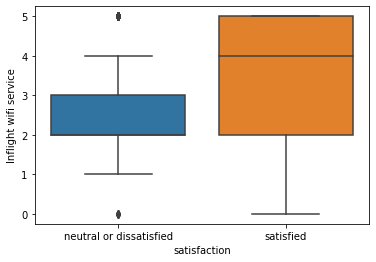

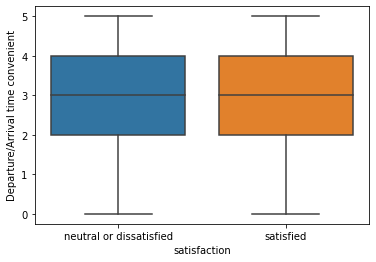

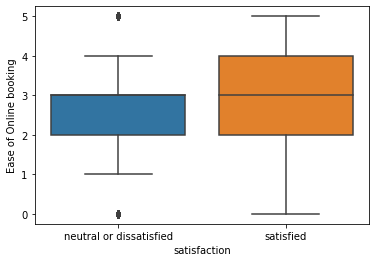

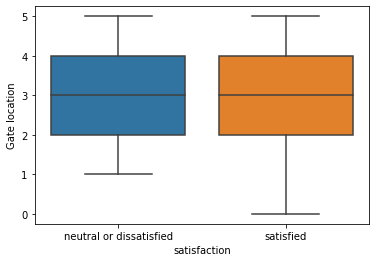

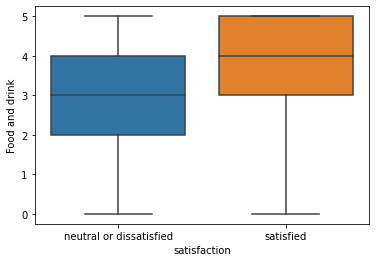

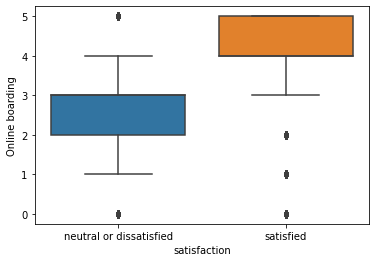

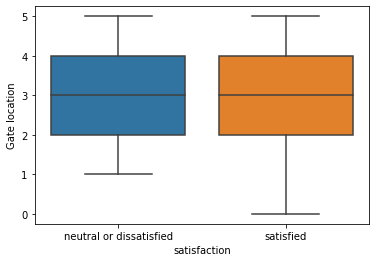

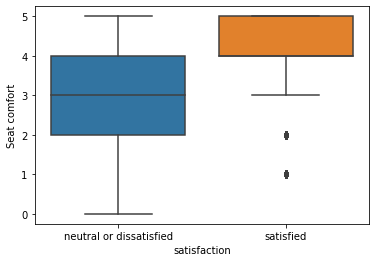

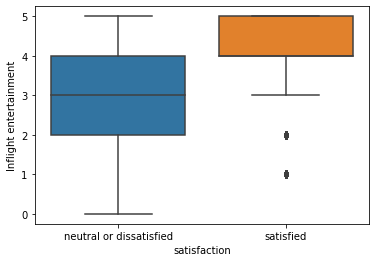

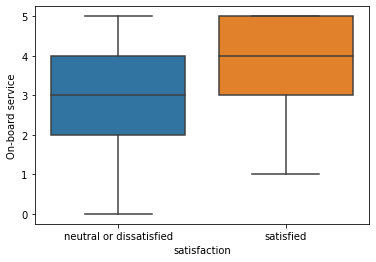

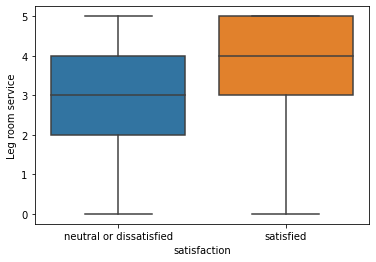

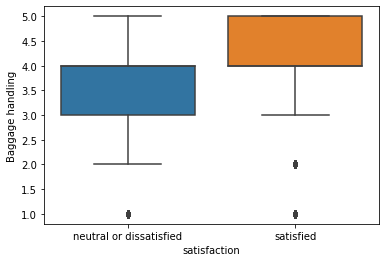

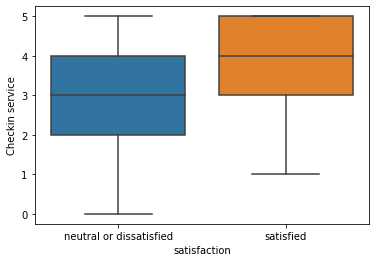

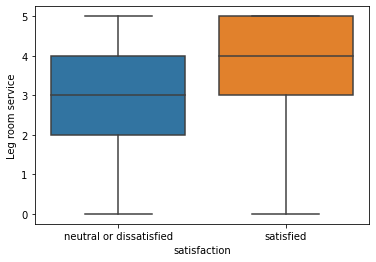

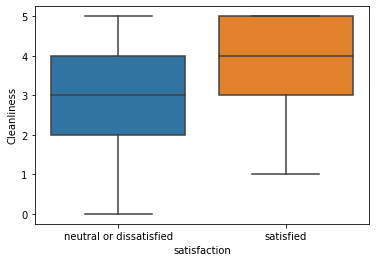

In [ ]:
for i in range(len(ind)):
  sns.boxplot(x="satisfaction", y=ind[i], data=df)
  plt.show()

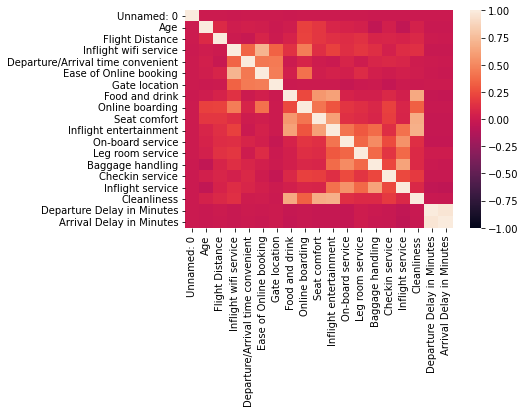

In [ ]:
sns.heatmap(df.corr(),vmin=-1,vmax=1)

Обработка категориальных признаков

In [ ]:
Gender = {'Male':0,
        'Female':1}

df['Gender'] = df['Gender'].map(Gender)

In [ ]:
CustomerType= {'Loyal Customer':0,
               'disloyal Customer':1}

df['Customer Type'] = df['Customer Type'].map(CustomerType)

In [ ]:
TypeofTravel= {'Business travel':0,
               'Personal Travel':1}

df['Type of Travel'] = df['Type of Travel'].map(TypeofTravel)

In [ ]:
Class= {'Business':0,
        'Eco':1,
        'Eco Plus':2}

df['Class'] = df['Class'].map(Class)

In [ ]:
satisfaction= {'neutral or dissatisfied':0,
               'satisfied':1}

df['satisfaction'] = df['satisfaction'].map(satisfaction)

In [ ]:
df

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,1,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,1,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,0,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,1,1,23,0,1,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,0,0,49,0,0,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,0,1,30,0,0,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,1,1,22,0,1,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0




---


**Подготовка данных**


In [ ]:
X = df.iloc[:, 0:23].values
Y = df.iloc[:,23].values

In [ ]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,13.0,1.0,2.0,460.0,3.0,4.0,3.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1.0,0.0,1.0,25.0,0.0,0.0,235.0,3.0,2.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,2.0,1.0,0.0,26.0,0.0,0.0,1142.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,3.0,1.0,0.0,25.0,0.0,0.0,562.0,2.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,4.0,0.0,0.0,61.0,0.0,0.0,214.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,103899.0,1.0,1.0,23.0,0.0,1.0,192.0,2.0,1.0,2.0,...,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0
103590,103900.0,0.0,0.0,49.0,0.0,0.0,2347.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
103591,103901.0,0.0,1.0,30.0,0.0,0.0,1995.0,1.0,1.0,1.0,...,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0
103592,103902.0,1.0,1.0,22.0,0.0,1.0,1000.0,1.0,1.0,1.0,...,1.0,1.0,4.0,5.0,1.0,5.0,4.0,1.0,0.0,0.0


In [ ]:
Y = pd.DataFrame(Y)
Y.head()

,0
0,0
1,0
2,1
3,0
4,1


In [ ]:
from sklearn.model_selection import train_test_split
N_train = int(len(X) * 0.8)
N_test = len(X) - N_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    train_size = N_train, test_size = N_test,
                                                    stratify = Y, random_state = 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**K-ближайших соседий**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_test_predict = knn.predict(X_test)

In [ ]:
err_test = 1 - knn.score(X_test, Y_test)
err_train = 1 - knn.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 5.270588235294116%
Ошибка на тесте: 7.490709011052655%


Понижение размерности PCA

In [ ]:
scaled_data_train = pd.DataFrame(X_train)

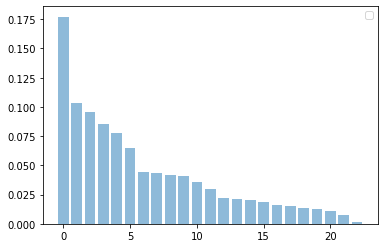

In [ ]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
plt.bar(range(0,23), var_exp, alpha=0.5,
        align='center')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca_train = PCA(n_components = 12)
pca_train.fit(scaled_data_train)
data_pca_X_train = pca_train.transform(scaled_data_train)
data_pca_X_train = pd.DataFrame(data_pca_X_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict = knn.predict(X_test)
err_train = 1 - knn.score(X_train, Y_train)
err_test = 1 - knn.score(X_test, Y_test)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 6.538763197586728%
Ошибка на тесте: 7.8285631545924055%


Из этого можно сделать вывод, что при понижении размерности в данном датаесте, ошибка возрастает. В данном случае найден лучший вариант, когда ошибка не такая большая. То есть чтобы более точно предсказывать значения "satisfaction", необходимо использовать все признаки датасета.

**RandomForest**

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = tree_model.predict(X_test)

In [ ]:
tree.export_graphviz(tree_model, out_file = 'iris_tree.dot')
!dot -Tpng iris_tree.dot -o iris_tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.26367 to fit


Изображение дерева получилось слишком большое, colab не может вывести его(

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


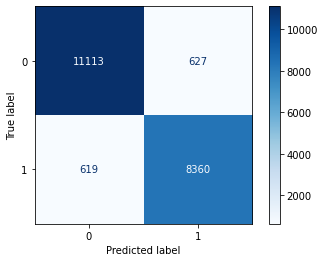

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_model, X_test, Y_test, cmap=plt.cm.Blues)
pass

In [ ]:
err_test = 1 - tree_model.score(X_test, Y_test)
err_train = 1 - tree_model.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 0.0%
Ошибка на тесте: 6.013803755007485%


Вывод: ошибка в методе K-ближайших для тестовых данных получилась меньше

**Построим дерево решений для задачи классификации**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, Y_train)

<ipython-input-47-eeb68591c412>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(random_state=5)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


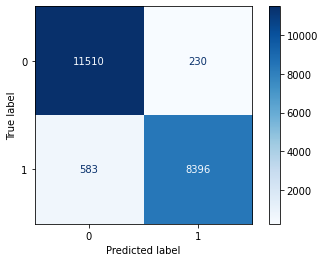

In [ ]:
plot_confusion_matrix(rfc, X_test, Y_test, cmap=plt.cm.Blues)
pass

In [ ]:
err_test = 1 - rfc.score(X_test, Y_test)
err_train = 1 - rfc.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 0.0012066365007501467%
Ошибка на тесте: 3.923934552825914%


Вывод: ошибка уменьшилась.

Теперь подберем оптимальные значения гиперпараметров и построим график зависимости ошбики от количества деревьев

In [ ]:
n_estimators_arr = [i for i in range(1, 10)] + [i for i in range(10, 100, 10)]
test_err = []
train_err = []
for n in n_estimators_arr:
    rfc_model = RandomForestClassifier(n_estimators = n)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    Y_train_res = np.reshape(Y_train, len(Y_train))
    y_train_pred_res = np.reshape(y_train_pred, (len(y_train_pred),1))
    Y_test_res = np.reshape(Y_test, len(Y_test))
    y_test_pred_res = np.reshape(y_test_pred, (len(y_test_pred),1))
    train_err.append(np.mean(Y_train_res != y_train_pred_res)[0])
    test_err.append(np.mean(Y_test_res != y_test_pred_res)[0])
    print('n:', n)

<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 1


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 2


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 3


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 4


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 5


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 6


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 7


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 8


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 9


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 10


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 20


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 30


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 40


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 50


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 60


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 70


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 80


<ipython-input-87-19f4ecb5c240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


n: 90


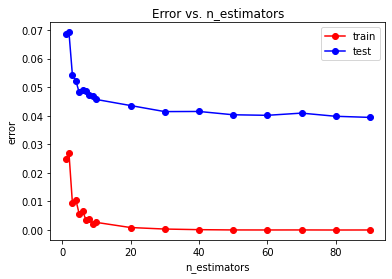

In [ ]:
plt.plot(n_estimators_arr, train_err, 'r-o', label = 'train')
plt.plot(n_estimators_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

Теперь рассмотрим зависимость от параметра max_depth (максимальная глубина дерева)

In [ ]:
max_depth_arr = [i for i in range(1, 10)] + [i for i in range(10, 100, 10)]
test_err = []
train_err = []
for depth in max_depth_arr:
    rfc_model = RandomForestClassifier(max_depth = depth)
    rfc_model.fit(X_train, Y_train)

    y_train_pred = rfc_model.predict(X_train)
    y_test_pred = rfc_model.predict(X_test)
    y_train_pred_res = np.reshape(y_train_pred, (len(y_train_pred),1))
    y_test_pred_res = np.reshape(y_test_pred, (len(y_test_pred),1))
    train_err.append(np.mean(Y_train_res != y_train_pred_res))
    test_err.append(np.mean(Y_test_res != y_test_pred_res))
    print('depth:', depth)

<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 1


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 2


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 3


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 4


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 5


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 6


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 7


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 8


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 9


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 10


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 20


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 30


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 40


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 50


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 60


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 70


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 80


<ipython-input-90-06ccb560e482>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, Y_train)


depth: 90


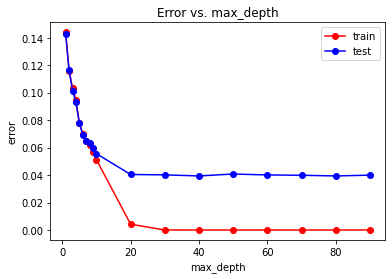

In [ ]:
plt.plot(max_depth_arr, train_err, 'r-o', label = 'train')
plt.plot(max_depth_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend()
pass

**Теперь построим логистическую регрессию**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
err_test = 1 - model_lr.score(X_test, Y_test)
err_train = 1 - model_lr.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 12.406636500754143%
Ошибка на тесте: 12.384767604614122%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


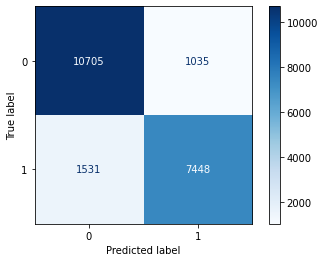

In [ ]:
plot_confusion_matrix(model_lr, X_test, Y_test, cmap=plt.cm.Blues)

Вывод: логистическая регрессия не подходит для решения данной задачи

Построим нейронную сеть

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha,
                              hidden_layer_sizes = 50,
                              solver = 'lbfgs',
                              max_iter = 1000,
                              activation = 'logistic',
                              random_state = 42)


    mlp_model.fit(X_train, Y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    y_train_pred_res = np.reshape(y_train_pred, (len(y_train_pred),1))
    y_test_pred_res = np.reshape(y_test_pred, (len(y_test_pred),1))
    train_err.append(np.mean(Y_train_res != y_train_pred_res))
    test_err.append(np.mean(Y_test_res != y_test_pred_res))
    train_acc.append(accuracy_score(Y_train_res, y_train_pred_res))
    test_acc.append(accuracy_score(Y_test_res, y_test_pred_res))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

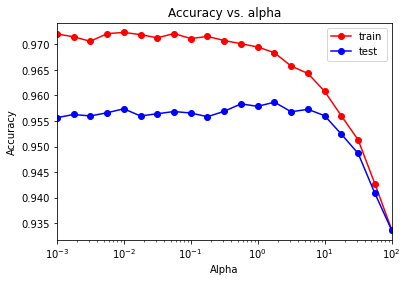

In [ ]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

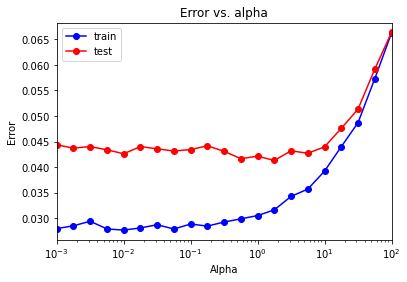

In [ ]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.02766817496229261
Minimum error on the testing set:  0.041314735267146095


In [ ]:
for i in range(len(test_err)):
  if test_err[i][0] == min_test_err:
    alpha_local_opt = alpha_arr[i]
print('Optimal alpha value: ', alpha_local_opt)

Optimal alpha value:  1.7782794100389228


In [ ]:
mlp_model = MLPClassifier(alpha = alpha_local_opt,
                          hidden_layer_sizes = 50,
                          solver = 'lbfgs',
                          max_iter = 1000,
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1.7782794100389228,
              hidden_layer_sizes=50, max_iter=1000, random_state=42,
              solver='lbfgs')

In [ ]:
err_test = 1 - mlp_model.score(X_test, Y_test)
err_train = 1 - mlp_model.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 3.1638009049773763%
Ошибка на тесте: 4.131473526714613%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


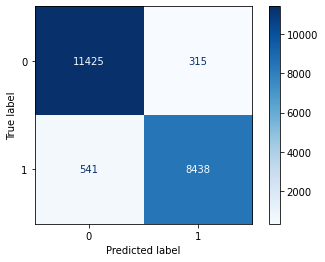

In [ ]:
plot_confusion_matrix(mlp_model, X_test, Y_test, cmap=plt.cm.Blues)

**Вывод:**


Всех лучше отработал метод RandomForest. Ошибка на обучающей выборке составила 0%, на тренировочной - 3.923934552825914%. Переобучения не наблюдалось ни в одном из методов. Также во всех методах Confusion matrix соответствовала полученной ошибке.